<a href="https://colab.research.google.com/github/JosiasRuiz/MarriotMNA/blob/main/ImageCoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/JosiasRuiz/MarriotMNA.git

Cloning into 'MarriotMNA'...
remote: Enumerating objects: 486, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 486 (delta 8), reused 14 (delta 6), pack-reused 468
Receiving objects: 100% (486/486), 930.41 MiB | 36.08 MiB/s, done.
Resolving deltas: 100% (9/9), done.
Updating files: 100% (438/438), done.


In [19]:
import json
import csv
import base64
import os
import io
import random
import pathlib
import calendar

from IPython.display import HTML
from base64 import b64encode
from datetime import date
from datetime import timedelta

Función para visualizar imagen capturada por el formulario

562725



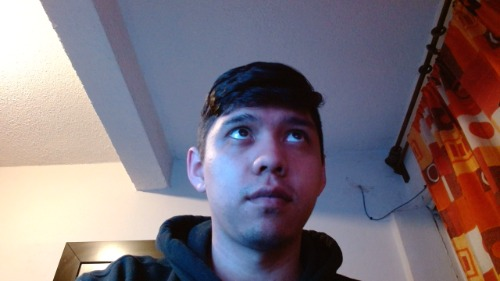

In [ ]:
with open("MarriotMNA/562725.json", "r") as f:
  file_data = json.load(f)
print(file_data["id_reservation"])
image_bytes = file_data["img"]
image_bytes = image_bytes[23:]

width=None
height=None

data_url = 'data:image/jpeg;base64,' + image_bytes

width_str = "width='%d'" % (width) if width is not None else ''
height_str = "height='%d'" % (width) if height is not None else ''
display(HTML("<img src='%s' %s%s>" % (data_url, width_str, height_str)))

Función para extraer la imagen del JSON y guardarla en formato JPG

In [ ]:
with open("MarriotMNA/562725.json", "r") as f:
  file_data = json.load(f)
#print(file_data["id_reservation"])
image_data  =  base64.b64decode(file_data["img"].split(",")[1])

with open("562725.jpg", "wb") as f:
    f.write(image_data)

562725


In [61]:
def generate_full_name(origin):
    if origin == "asian":
        return random.choice([
            "Li Ming",
            "Zhang Wei",
            "Wang Xiao",
            "Chen Yu",
            "Liu Hao"
        ])
    elif origin == "hispanic":
        return random.choice([
            "Juan Pérez",
            "María García",
            "José López",
            "Ana Rodríguez",
            "Pedro Sánchez"
        ])
    elif origin == "american":
        return random.choice([
            "John Smith",
            "Mary Jones",
            "David Brown",
            "Susan Williams",
            "Michael Johnson"
        ])

def generate_email():
    length = random.randint(10, 50)
    return "".join(random.choice("abcdefghijklmnopqrstuvwxyz0123456789") for _ in range(length)) + "@gmail.com"

def generate_phone_number():
    return "+" + str(random.randint(1, 999)) + str(random.randint(1, 999)) + str(random.randint(1, 999)) + str(random.randint(1, 999)) + str(random.randint(1, 999))

def generate_id_reservation():
    return str(random.randint(1, 999)) + str(random.randint(1, 999)) + str(random.randint(1, 999)) + str(random.randint(1, 999)) + str(random.randint(1, 999))

def generate_arrival_date():
    start_date = date.today() + timedelta(days=random.randint(1, 10))
    return start_date

def generate_arrival_hour():
    return random.randint(0, 24)

def generate_checkout_date(arrival_date):
    checkout_date = arrival_date + timedelta(days=random.randint(3, 15))
    return checkout_date

def generate_checkout_hour():
    return random.randint(0, 24)

def generate_room_type():
    return random.choice(["Suite", "Familiar", "Double", "Single"])

def generate_special_requests():
    return random.choice(["nothing", "early check-in", "late check-out", "extra bed", "breakfast included"])

def generate_image(folder):
    #imagen = f"data:image/jpeg;base64," + base64.standard_b64encode(open(f"MarriotMNA/DS/{folder}/ID_"+str(random.randint(1, 2))+".jpg", "rb").read()).decode()
    imagen = base64.standard_b64encode(open(f"MarriotMNA/DS/{folder}/ID_"+str(random.randint(1, 2))+".jpg", "rb").read()).decode()
    return imagen

def generate_json_data(origin, folder):
    arrival_date=generate_arrival_date()
    data = {"id_reservation": generate_id_reservation,
        "fullName": generate_full_name(origin),
        "email": generate_email(),
        "phoneNumber": generate_phone_number(),
        "arrivalDate": arrival_date,
        "arrivalHour": generate_arrival_hour(),
        "checkoutDate": generate_checkout_date(arrival_date),
        "checkoutHour": generate_checkout_hour(),
        "roomType": generate_room_type(),
        "specialRequests": generate_special_requests(),
        "img": generate_image(folder)
        }

    return data

def extraer_nombres_carpetas(directorio):
  nombres_carpetas = []
  for carpeta in pathlib.Path(directorio).iterdir():
    if carpeta.is_dir():
      nombres_carpetas.append(carpeta.name)
  return nombres_carpetas

In [60]:
def main():
  origins = ["asian", "hispanic", "american"]

  folders = extraer_nombres_carpetas("MarriotMNA/DS")
  for folder in folders[0:2]:
    print(folder)
    # Llamamos a la función para crear el archivo JSON
    registro = generate_json_data(random.choice(origins),folder)

    id = registro["id_reservation"]
    print(id)
    file_name="MarriotRegistros/"+str(id) + ".json"
    print(file_name)
    #with open(file_name, "w") as f:
      #json.dump(registro, f)
    #print(registro)

if __name__ == "__main__":
    main()


0001ca9b9a--61ac9cfdd211124f5daebd40_age_33_name_Mykhailo
<function generate_id_reservation at 0x7becbe966320>
MarriotRegistros/<function generate_id_reservation at 0x7becbe966320>.json
0001ca9b9a--61ab5c83d6d182382f227ccb_age_34_name_Miia
<function generate_id_reservation at 0x7becbe966320>
MarriotRegistros/<function generate_id_reservation at 0x7becbe966320>.json
